Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 20PDT001 - Gas side pressure difference
Col. 4 : 50TT001 - Cooling side inlet temperature
Col. 5 : 50PT001 - Cooling side inlet pressure
Col. 6 : 50TT002 - Cooling side outlet temperature
Col. 7 : 50PDT001 - Cooling side pressure differential

Finding data between 2020-01-01 00:00:00 and 2020-04-01 

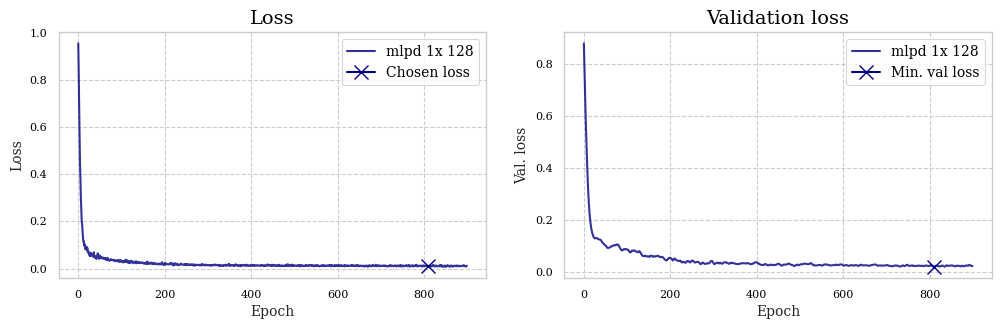

Model prediction scores
+-------------+-------------+------------+
|    Model    | Train score | Test score |
+-------------+-------------+------------+
| mlpd 1x 128 |    0.9939   |   0.7649   |
|   linear r  |    0.9068   |   0.5415   |
+-------------+-------------+------------+


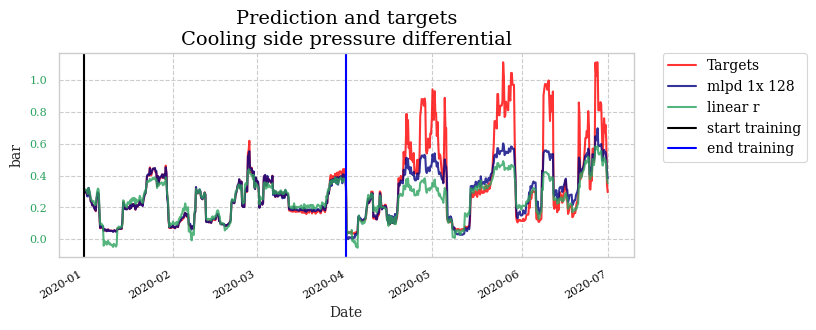

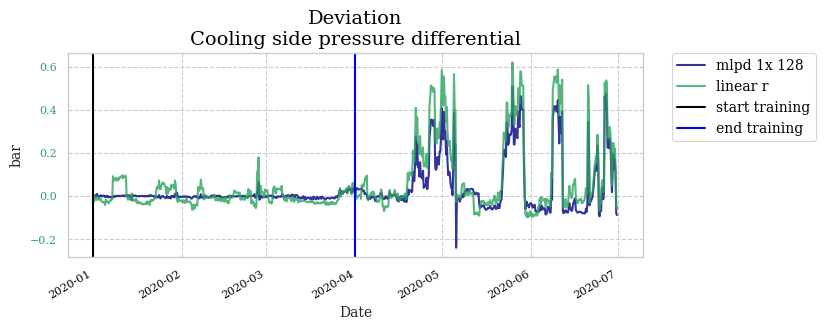

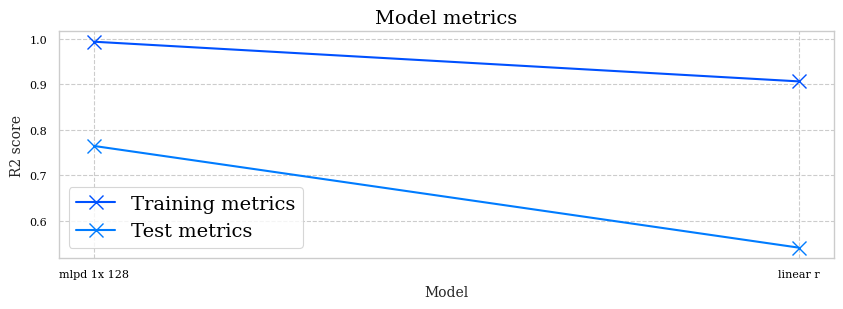

In [3]:
# %load example_D_basic.py
import statApi
from api import Api
mlApi = Api()

# define dataset specifics
filename = "../master-thesis-db/datasets/D/dataC.csv"

columns = [
    ['20TT001', 'Gas side inlet temperature', 'degrees'],
    ['20PT001', 'Gas side inlet pressure', 'barG'],
    ['20FT001', 'Gas side flow', 'M^3/s'],
    ['20TT002', 'Gas side outlet temperature', 'degrees'],
    ['20PDT001', 'Gas side pressure difference', 'bar'],
    ['50TT001', 'Cooling side inlet temperature', 'degrees'],
    ['50PT001', 'Cooling side inlet pressure', 'barG'],
    ['50FT001', 'Cooling side flow', 'M^3/s'],
    ['50TT002', 'Cooling side outlet temperature', 'degrees'],
    ['50PDT001', 'Cooling side pressure differential', 'bar'],
    ['50TV001', 'Cooling side valve opening', '%'],
]

irrelevantColumns = [
    '50TV001',
    '50FT001',
    '20FT001',
]

targetColumns = [
    '50PDT001',
]

traintime = [
        ["2020-01-01 00:00:00", "2020-04-01 00:00:00"],
    ]

testtime = [
    "2020-01-01 00:00:00",
    "2020-08-01 00:00:00"
]

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

mlpd_1x_128 = mlApi.MLP('mlpd 1x 128', layers=[128], dropout=0.2)
lstmd_1x_128 = mlApi.LSTM('lstmr 1x 128', layers=[128], dropout=0.2, recurrentDropout=0.2)

linear = mlApi.Linear('linear')
linear_r = mlApi.Linear_Regularized('linear r')

modelList = [
	mlpd_1x_128,
	#lstmd_1x_128,
	#linear,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)